## Herramientas de mapeo

GeoPandas proporciona una interfaz de alto nivel a la biblioteca MatPlotLib
para hacer mapas. Mapear formas es tan fácil como usar el método *plot()* en
un GeoSeries o GeoDataFrame .

### Mapas de Coropleta

Geopandas facilita la creación de mapas Choropleth (mapas donde el color de
cada forma se basa en el valor de una variable asociada). Simplemente use el
comando de trazado con el argumento de column establecido en la columna
cuyos valores desea usar para asignar colores. 

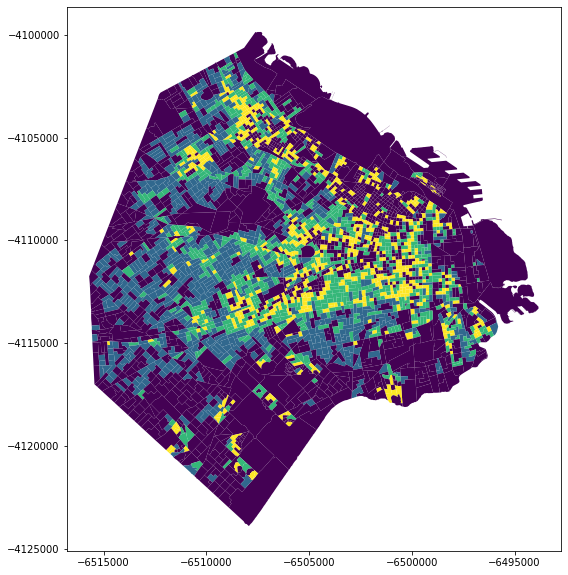

In [ ]:
# Mapeo de la Densidad
censo['logRatio'] = (censo.TOT_POB/ censo.AREA)
censo.plot(column='logRatio', scheme='quantiles', figsize=(10, 10))

###  Agregar un mapa de fondo 

Este ejemplo muestra cómo puede agregar un mapa base de fondo a las parcelas creadas con el método *.plot()*. Esto hace uso del paquete contextual para recuperar mosaicos de mapas web de varias fuentes (OpenStreetMap, Stamen).

¿En que coordenadas están?

In [ ]:
censo.crs

{'init': 'epsg:22183'}

Las convertimos a Web-Mercator 

In [ ]:
censo = censo.to_crs(epsg=3857)

Y luego mapeo

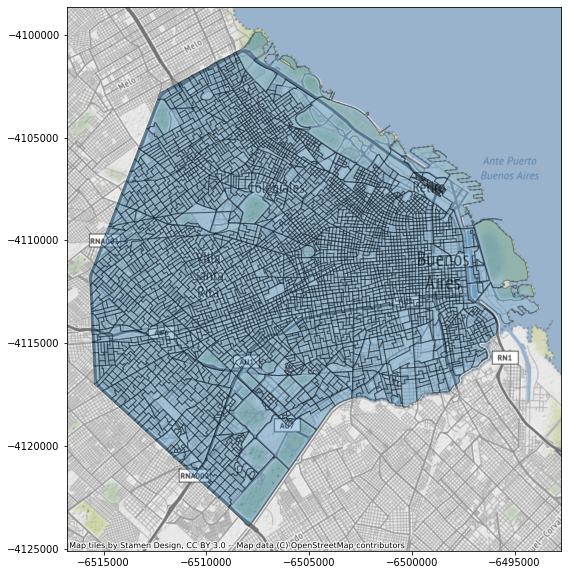

In [ ]:
ax = censo.plot(figsize=(10, 10), alpha=0.35, edgecolor='k')
ctx.add_basemap(ax)

### Combinando varias capas

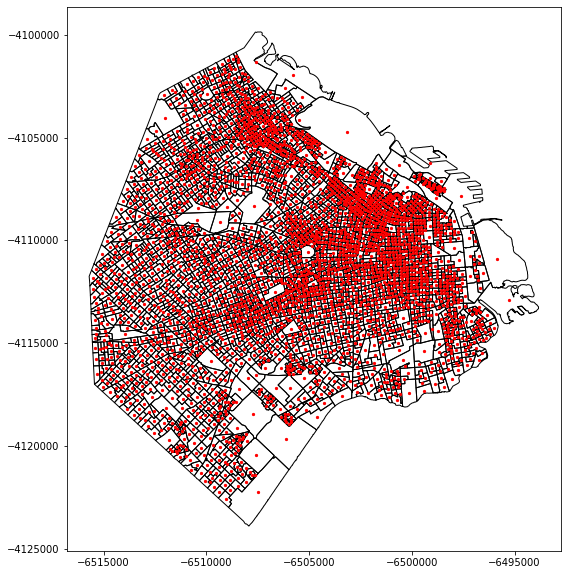

In [ ]:
# calculo el centroide de cada radio
aux = censo.centroid
# ploteo mi mapa base
base = censo.plot( figsize=(10, 10), color='None', edgecolor='black')
# añado mis centroides
aux.plot(ax=base, marker='o', color='red', markersize=5)



## Agregación con disolver

Los datos espaciales a menudo son más granulares de lo que necesitamos. Por ejemplo, podríamos tener datos sobre unidades subnacionales, pero en realidad estamos interesados en estudiar patrones a nivel de países.

En un entorno no espacial, cuando todo lo que necesitamos son estadísticas resumidas de los datos, usamos la función groupby. Pero para los datos espaciales, a veces también necesitamos agregar características geométricas. En la biblioteca de geopandas, podemos agregar características geométricas usando la función dissolve.

Se puede pensar que dissolve hace tres cosas: 
1. Disuelve todas las geometrías dentro de un grupo dado en una sola característica geométrica (usando el método unary_union)
2. Agrega todas las filas de datos en un grupo usando groupby.aggregate()
3. Combina esos dos resultados. 

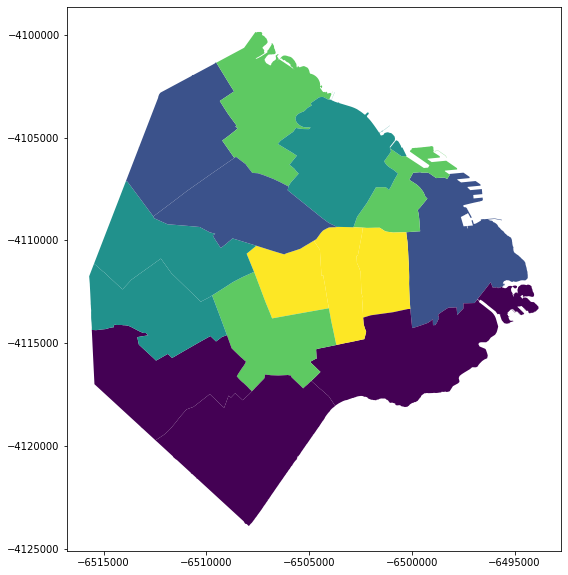

In [ ]:
# Densidad a nivel Departamento. ¿MAUP?
fracciones = censo[['DEPTO','AREA','TOT_POB','geometry']].dissolve(by='DEPTO', aggfunc='sum')
fracciones['logRatio'] = (fracciones.TOT_POB/ fracciones.AREA)
fracciones.plot(column='logRatio', scheme='quantiles', figsize=(10, 10))

## Fuentes

Este documento es una adaptación (cual "El Hobbit" de Peter Jackson) del libro "Ciencia de Datos para Gente Sociable" de Antonio el Gris

https://bitsandbricks.github.io/ciencia_de_datos_gente_sociable/

y de la documentación oficial de Geopandas

http://geopandas.org/index.html